In [ ]:
# data processing
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/Unemployment_Rate_upto_11_2020.xlsx')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.shape

(267, 9)

In [ ]:
df.rename(columns={'Region.1': 'Area'}, inplace=True)

In [ ]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
Longitude                                  0
Latitude                                   0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Area                                     267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Area                                     267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Area                                               object
Longitude                                         float64
Latitude                                          float64
dtype: object

In [ ]:
# selecting the categorical variables
categorical_var = df.select_dtypes(include='object')
# Obtaining summary statistics for the categorical variables
categorical_stat = categorical_var.describe().T
categorical_stat# selecting numerical variables
numerical_var = df.select_dtypes(exclude='object')
# Obtaining summar statistics for the numerical variables
numerical_stat = numerical_var.describe().T
numerical_stat

,count,unique,top,freq
Region,267,27,Andhra Pradesh,10
Frequency,267,1,M,267
Area,267,5,North,79


In [ ]:
# selecting numerical variables
numerical_var = df.select_dtypes(exclude='object')
# Obtaining summar statistics for the numerical variables
numerical_stat = numerical_var.describe().T
numerical_stat

,count,mean,min,25%,50%,75%,max,std
Date,267,2020-06-16 09:15:30.337078528,2020-01-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-08-31 00:00:00,2020-10-31 00:00:00,NaN
Estimated Unemployment Rate (%),267.0,12.236929,0.5,4.845,9.65,16.755,75.85,10.803283
Estimated Employed,267.0,13962105.722846,117542.0,2838930.5,9732417.0,21878686.0,59433759.0,13366318.359733
Estimated Labour Participation Rate (%),267.0,41.681573,16.77,37.265,40.39,44.055,69.69,7.845419
Longitude,267.0,22.826048,10.8505,18.1124,23.6102,27.2784,33.7782,6.270731
Latitude,267.0,80.532425,71.1924,76.0856,79.0193,85.2799,92.9376,5.831738


In [ ]:
df = df.drop('Frequency', axis=1)
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Longitude,Latitude
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.74


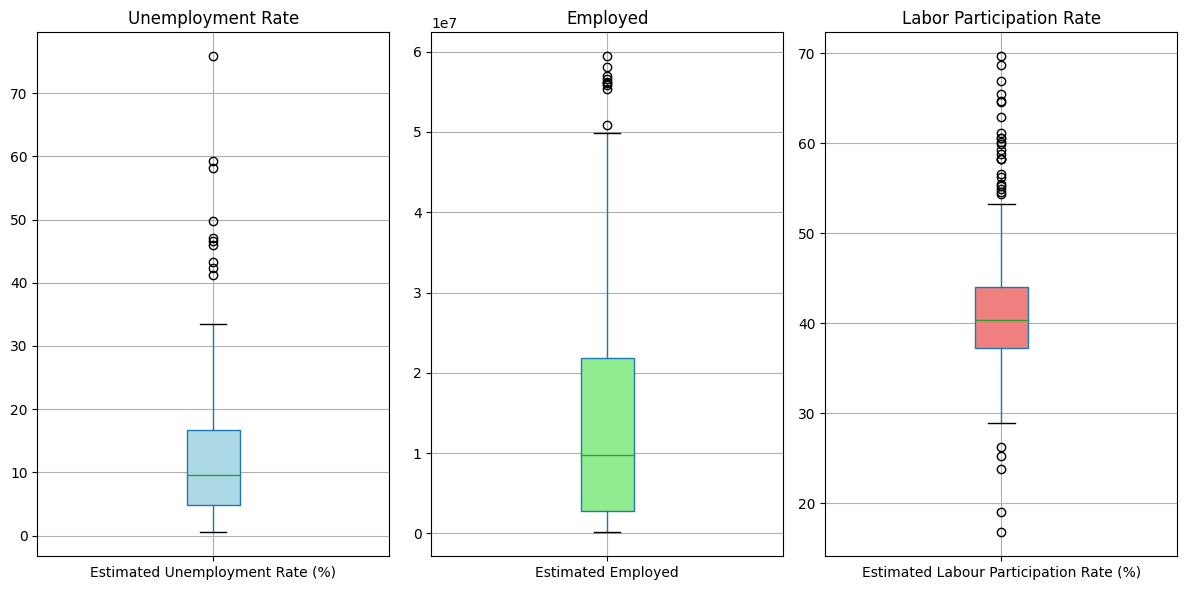

In [ ]:
# Outlier detection
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create a figure with three subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Unemployment Rate
plt.subplot(131)
df.boxplot(column='Estimated Unemployment Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[0])  # Set the color of the first box
plt.title('Unemployment Rate')

# Subplot 2: Employed
plt.subplot(132)
df.boxplot(column='Estimated Employed', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[1])  # Set the color of the second box
plt.title('Employed')

# Subplot 3: Labor Participation Rate
plt.subplot(133)
df.boxplot(column='Estimated Labour Participation Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[2])  # Set the color of the third box
plt.title('Labor Participation Rate')

plt.tight_layout()
plt.show()

In [ ]:
# df=df.drop('Region',axis=1)
df=df.drop('Area',axis=1)

<Axes: >

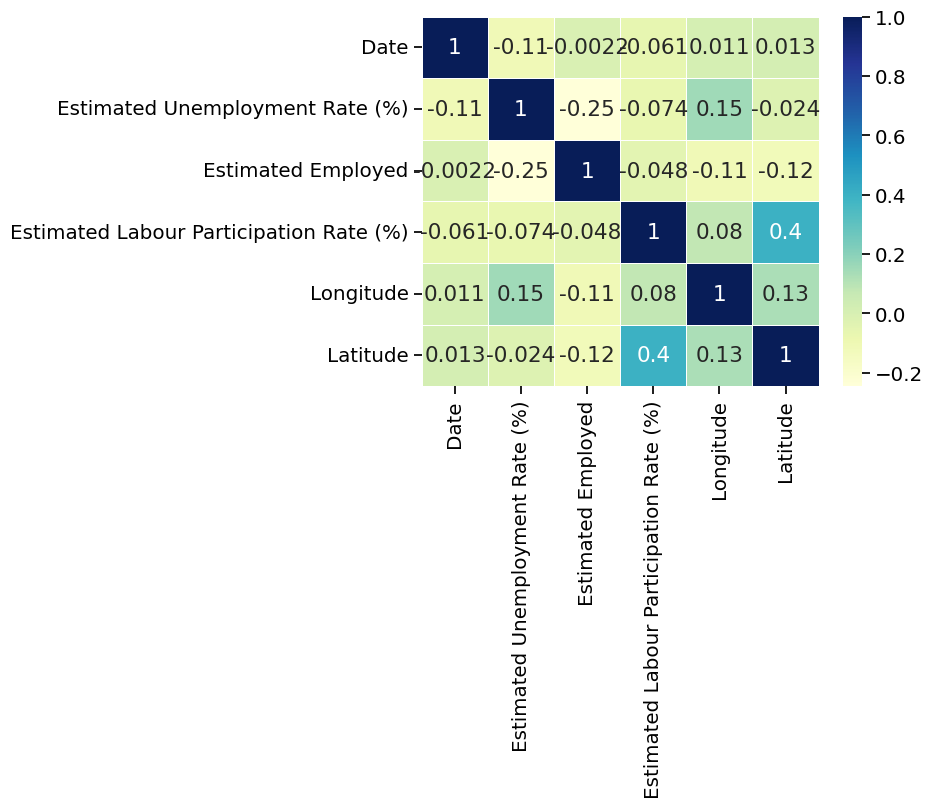

In [ ]:
# Correlation plot
sns.set_context('notebook', font_scale=1.3)
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)

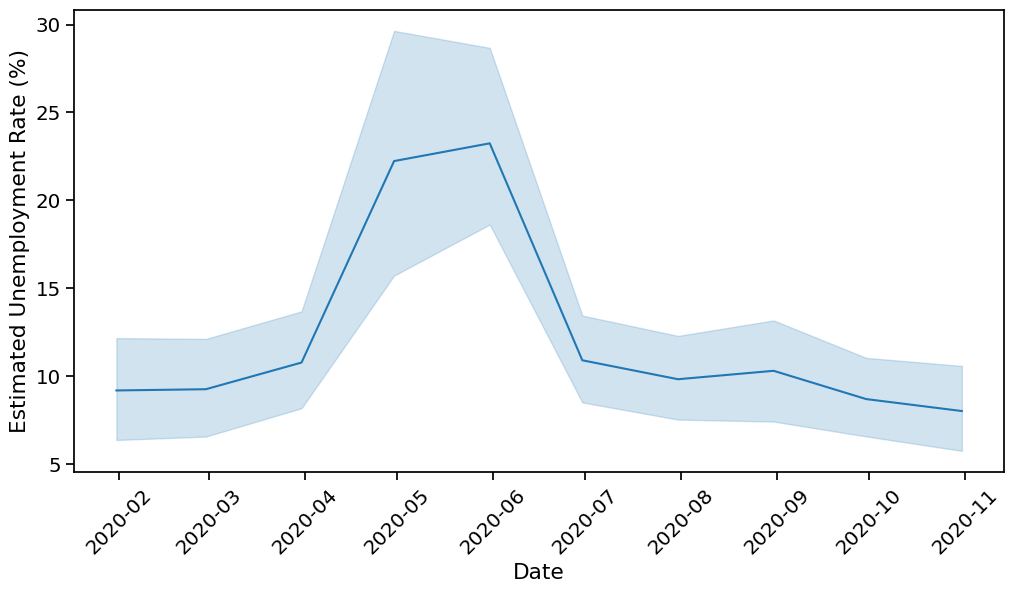

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Longitude,Latitude
0,2020-01-31,5.48,16635535,41.02,15.9129,79.740
1,2020-02-29,5.83,16545652,40.90,15.9129,79.740
2,2020-03-31,5.79,15881197,39.18,15.9129,79.740
3,2020-04-30,20.51,11336911,33.10,15.9129,79.740
4,2020-05-31,17.43,12988845,36.46,15.9129,79.740
...,...,...,...,...,...,...
262,2020-06-30,7.29,30726310,40.39,22.9868,87.855
263,2020-07-31,6.83,35372506,46.17,22.9868,87.855
264,2020-08-31,14.87,33298644,47.48,22.9868,87.855
265,2020-09-30,9.35,35707239,47.73,22.9868,87.855


In [ ]:
df.head()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Longitude,Latitude
0,2020-01-31,5.48,16635535,41.02,15.9129,79.74
1,2020-02-29,5.83,16545652,40.90,15.9129,79.74
2,2020-03-31,5.79,15881197,39.18,15.9129,79.74
3,2020-04-30,20.51,11336911,33.10,15.9129,79.74
4,2020-05-31,17.43,12988845,36.46,15.9129,79.74


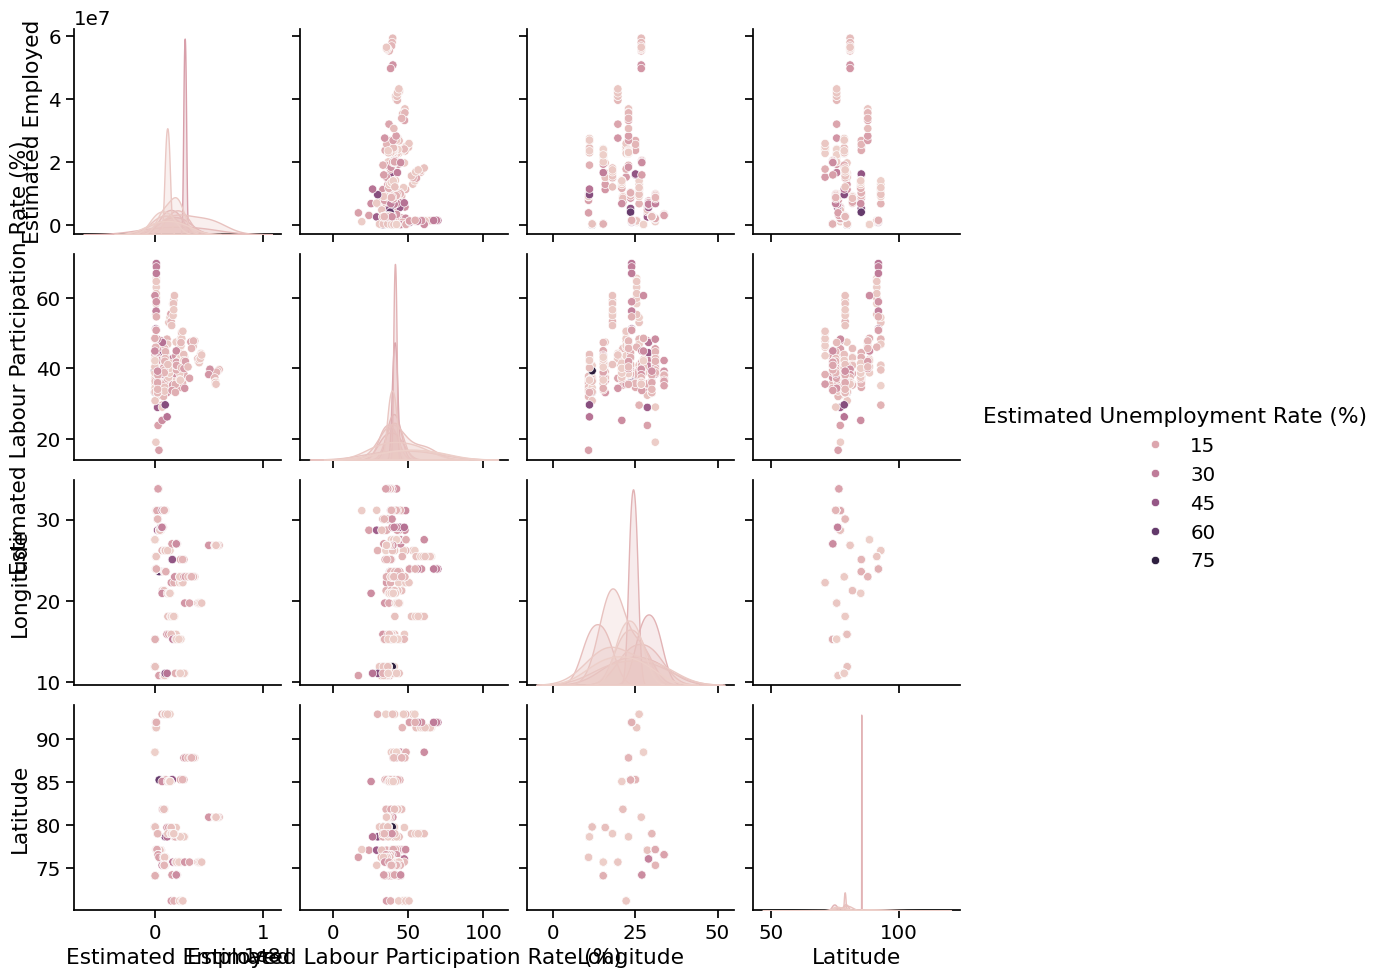

In [ ]:
# Pair plot
sns.pairplot(df, hue='Estimated Unemployment Rate (%)')

In [ ]:
import plotly.express as px
plot_unemp = df[['Estimated Unemployment Rate (%)','Estimated Employed']]
df_unemployed = plot_unemp.groupby('Estimated Employed').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate (%)')

fig = px.bar(df_unemployed, x='Estimated Employed',y='Estimated Unemployment Rate (%)',color = 'Estimated Employed',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

In [ ]:
fig = px.violin(
    df,
    x='Longitude',
    y='Estimated Unemployment Rate (%)',
    title='Distribution of Unemployment Rates by Areas',
    box=True,  # Include box plot inside the violin
    points='all',  # Show individual data points
)

fig.show()

In [ ]:
fig = px.area(
    df,
    x='Date',
    y='Estimated Labour Participation Rate (%)',
    color='Longitude',
    labels={'Estimated Labour Participation Rate (%)': 'Labour Participation Rate (%)'},
    category_orders={'Longitutde': df['Longitude'].unique()}  # Preserve the order of regions
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Labour Participation Rate (%)',
    legend_title='Region',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

fig.show()

In [ ]:
# Extracting month from date
df['Month'] = df['Date'].dt.month
df

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Longitude,Latitude,Month
0,2020-01-31,5.48,16635535,41.02,15.9129,79.740,1
1,2020-02-29,5.83,16545652,40.90,15.9129,79.740,2
2,2020-03-31,5.79,15881197,39.18,15.9129,79.740,3
3,2020-04-30,20.51,11336911,33.10,15.9129,79.740,4
4,2020-05-31,17.43,12988845,36.46,15.9129,79.740,5
...,...,...,...,...,...,...,...
262,2020-06-30,7.29,30726310,40.39,22.9868,87.855,6
263,2020-07-31,6.83,35372506,46.17,22.9868,87.855,7
264,2020-08-31,14.87,33298644,47.48,22.9868,87.855,8
265,2020-09-30,9.35,35707239,47.73,22.9868,87.855,9


In [ ]:
# Filter data for months 1 to 3 (before lockdown)
before_lock = df[(df['Month'] >= 1) & (df['Month'] <= 3)][['Longitude', 'Estimated Unemployment Rate (%)']]

In [ ]:
# Filter data for months 3 to 5 (after lockdown)
after_lock = df[(df['Month'] >= 3) & (df['Month'] < 6)][['Longitude', 'Estimated Unemployment Rate (%)']]

In [ ]:
before_lock = before_lock.groupby('Longitude')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={'Estimated Unemployment Rate (%)':'Unemployment Rate before Lock-Down'})

In [ ]:
after_lock = after_lock.groupby('Longitude')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={'Estimated Unemployment Rate (%)':'Unemployment Rate after Lock-Down'})

In [ ]:
before_lock['Percentage Change in Unemployment'] = round((after_lock['Unemployment Rate after Lock-Down'] - before_lock['Unemployment Rate before Lock-Down']) / before_lock['Unemployment Rate before Lock-Down'], 2)

<Axes: xlabel='Percentage Change in Unemployment', ylabel='Longitude'>

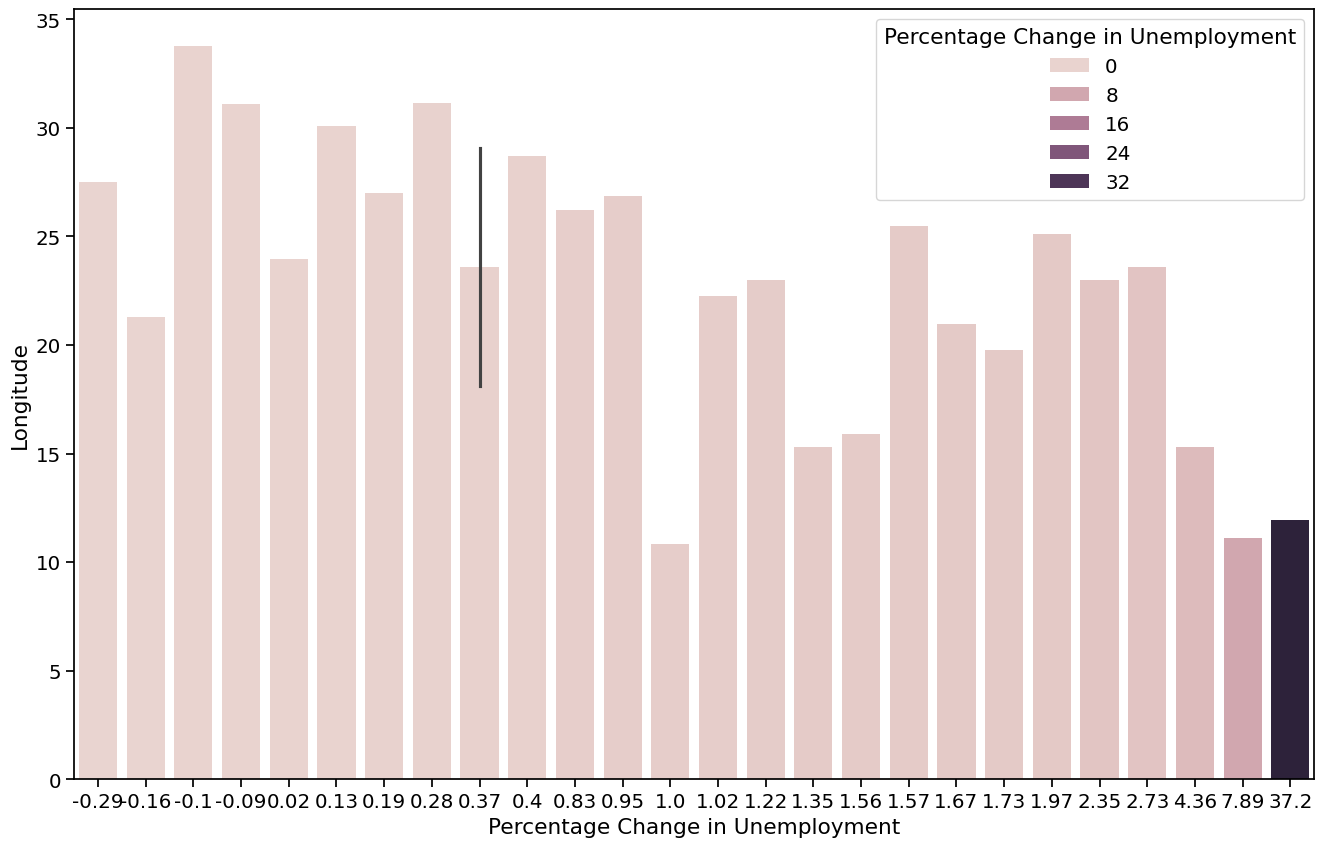

In [ ]:
plot_df = before_lock.sort_values('Percentage Change in Unemployment', ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(data=plot_df, y='Longitude', x='Percentage Change in Unemployment', hue="Percentage Change in Unemployment")